In [123]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt 
import seaborn as sns 
plt.style.use("ggplot")
pd.set_option("display.max_columns" ,40) # to see all the columns(here 40) for bigger datasets

In [124]:
# readign data using pandas lib
df = pd.read_csv("train.csv")
print(f"the dataframe has [{df.shape[0]}] rows and [{df.shape[1]}] columns")
print(f"the columns are : \n{df.columns}")

the dataframe has [891] rows and [12] columns
the columns are : 
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [125]:
# df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
#        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]


each columns has : 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 null values


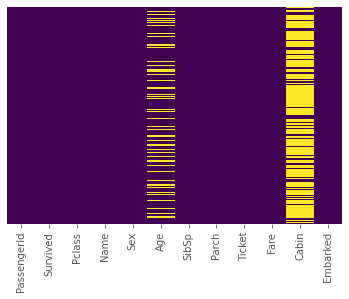

In [126]:
print(f"each columns has : \n{df.isnull().sum()} null values") # how many null does each columns have
# print(f"rows with missing values are : \n{df[df.isnull().any(axis=1)].head(20)}") # all te rows that have at least one missing value 
# heatmap of the missing values 
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.show()


In [127]:
# convering sex to numeric values 
df['Sex'] = df['Sex'].map({'male':0 , 'female':1}) # male = 0 , female = 1 

In [ ]:
# adding some value for the mising values of the age ... (we will add the median of the age)
df['Age'].fillna(df['Age'].median(), inplace=True)
#for the Embarked as well 
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipykernel_173001/1350206234.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_173001/1350206234.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [129]:
print(F"unique values for Embarked is : {df['Embarked'].unique()}")
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True) # if both Q ,S are zero then we can say that it's C

unique values for Embarked is : ['S' 'C' 'Q']


In [130]:
df.drop(['Name' , 'Ticket' , 'Cabin'] ,axis=1 , inplace=True) # removign these becuase they dont effect the training

In [131]:
# trying to nomalize the dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # THE SET values between 0 ,1 
df[['Age', 'Fare', 'SibSp', 'Parch']] = scaler.fit_transform(df[['Age', 'Fare', 'SibSp', 'Parch']])
df.head()
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
y = df['Survived'] # this is the lables
X = df.drop(columns=['PassengerId' , 'Survived'] , axis=1)

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% of the data for testing
print(f"X_train type is : {type(X_train)}")
print(f"X_train size is : {X_train.shape}")
print(f"X_test size is : {X_test.shape}")
print(f"y_train size is : {y_train.shape}")
print(f"y_test size is : {y_test.shape}")

X_train type is : <class 'pandas.core.frame.DataFrame'>
X_train size is : (712, 8)
X_test size is : (179, 8)
y_train size is : (712,)
y_test size is : (179,)


In [134]:
n_x = 8 # this is for the number of features 
n_h = 5 # this is the hidden layer neurans 
n_y = 1 # output layer (becuase this s a binary classification we have 1)

# init for random weights and biases 
W1 = np.random.randn(n_h, n_x) * 0.01  # Shape: (n_h, n_x)
b1 = np.zeros((n_h, 1))                # Shape: (n_h, 1)
W2 = np.random.randn(n_y, n_h) * 0.01   # Shape: (n_y, n_h)
b2 = np.zeros((n_y, 1))                # Shape: (n_y, 1)

### Activation functions
- Relu for hidden layer
- sigmoid for output layer

In [135]:
def relu(Z):
    return np.maximum(0 ,Z)

def sigmoid(Z):
    Z = np.array(Z, dtype=np.float64) # convert the type so we dont get any error
    return 1 / (1 + np.exp(-Z))

### forwand propagation
- Z[1] = W[1]X + b[1] ==> A[1] = ReLU(Z[1])
- Z[2] = W[2]A[1] + b[2] ==> A[2] = sigmoid(Z[2])



In [136]:
def forward_propagation(X , W1 , b1 , W2 , b2):
    # hidden layer
    Z1 = np.dot(W1 , X) + b1
    A1 = relu(Z1)
    
    # output layer
    Z2 = np.dot(W2 ,A1) + b2
    A2 = sigmoid(Z2)
    
    res = (Z1 , A1 , Z2 , A2)
    return A2 , res

### Cost Function (cross-entropy loss)
- J = $-\frac{1}{m}\sum_{i=1}^{m} [y^i\log{({A_{2}}^{(i)})} + (1 - y^{(i)})\log{(1 -{A_{2}}^{(i)} )}]$

In [137]:
def compute_cost(A2 , Y):
    m = Y.shape[1] # number of the examples
    
    cost = -np.sum(Y * np.log(A2) + (1 -Y) * np.log(1 - A2)) / m
    cost = np.squeeze(cost) # cost should be scaler
    return cost

### backward propagation
- Gradient for output layer
    - error term for output layer is : 
    $dZ^{[2]} = A^{[2]} - Y$
    - then we have <br>
     $ dW^{[2]} = \frac{1}{m}dZ^{[2]}.(A^{[1]})^{T} $ <br>
     $ db^{[2]} = \ \frac{1}{m}\sum_{}dZ^{[2]}$ <br>
- Gradient for output layer
    - propagate the error back <br>
    $dA^{[1]} = (W^{[2]})^{T}dZ^{[2]}$ <br>
    - for ReLU  , the drivite $\frac{d}{dx}ReLU(Z)$ is 1 if $z > 0$ and 0 otherwise <br>
    $ dZ^{[1]} = dA^{[1]} * g'(Z^{[2]})$ <br>
    where $ g'(Z^{[1]}) = 1$ if $Z^{[1]} > 0$ , else 0. <br>
    - then <br>
    $dW^{[1]} = \frac{1}{m}dZ^{[1]}.X^{T}$ <br>
    $db^{[1]} = \frac{1}{m}\sum_{}dZ^{[1]}$

In [138]:
def backward_propagation(X, Y, cache, W2):
    m = X.shape[1]
    Z1, A1, Z2, A2 = cache

    # Output layer error
    dZ2 = A2 - Y                   # Shape: (1, m)
    dW2 = (1/m) * np.dot(dZ2, A1.T)  # Shape: (1, n_h)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    # Hidden layer error
    dA1 = np.dot(W2.T, dZ2)         # Shape: (n_h, m)
    dZ1 = dA1 * (Z1 > 0)            # Derivative of ReLU
    dW1 = (1/m) * np.dot(dZ1, X.T)   # Shape: (n_h, n_x)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return gradients


### updating the parameters
- $parameter = parameter - \alpha \times gradinet $

In [139]:
def update_parameters(W1, b1, W2, b2, gradients, learning_rate):
    W1 = W1 - learning_rate * gradients["dW1"]
    b1 = b1 - learning_rate * gradients["db1"]
    W2 = W2 - learning_rate * gradients["dW2"]
    b2 = b2 - learning_rate * gradients["db2"]
    
    return W1, b1, W2, b2


In [166]:
costs = []

def neural_network_model(X, Y, n_h, num_iterations=10000, learning_rate=0.01, print_cost=False):
    np.random.seed(42)  # for reproducibility
    n_x = X.shape[0]
    n_y = Y.shape[0]

    # Initialize parameters
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    for i in range(num_iterations):
        A2, cache = forward_propagation(X, W1, b1, W2, b2)
        
        cost = compute_cost(A2, Y)
        costs.append(cost)
        
        gradients = backward_propagation(X, Y, cache, W2)
        
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, gradients, learning_rate)
        
        if print_cost and i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost}")
                  
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters


In [ ]:
# runnning the code 
X_train_np = X_train.values.T  # Now shape is (n_x, m_train)
y_train_np = y_train.values.reshape(1, -1)  # Shape: (1, m_train)

# Similarly for test data:
X_test_np = X_test.values.T    # Shape: (n_x, m_test)
y_test_np = y_test.values.reshape(1, -1)      # Shape: (1, m_test)

# Train the network:
parameters = neural_network_model(X_train_np, y_train_np, 
                                  n_h=5,             # number of neurons in the hidden layer (you can adjust)
                                  num_iterations=10000, 
                                  learning_rate=0.05, 
                                  print_cost=True)


Cost after iteration 0: 0.6931652704092118
Cost after iteration 1000: 0.47874070992626483
Cost after iteration 2000: 0.45647047521127004
Cost after iteration 3000: 0.45151118145914054
Cost after iteration 4000: 0.44998147901853647
Cost after iteration 5000: 0.44941193126931545
Cost after iteration 6000: 0.4488065932277453
Cost after iteration 7000: 0.4485445190720947
Cost after iteration 8000: 0.4484023855473621
Cost after iteration 9000: 0.4483078734500014


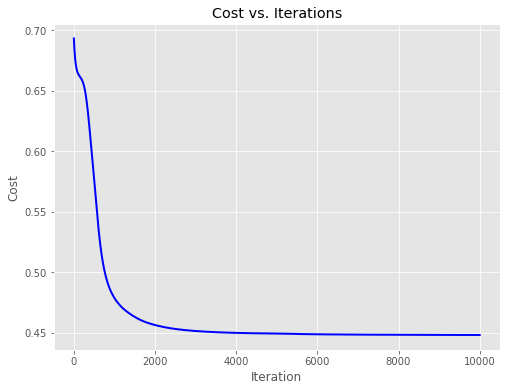

In [168]:
iterations = np.arange(0, len(costs)) 

plt.figure(figsize=(8, 6))
plt.plot(iterations, costs, 'b-', linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs. Iterations")
plt.grid(True)
plt.show()

In [241]:
A2_test, _ = forward_propagation(X_test_np, parameters["W1"], parameters["b1"],
                                  parameters["W2"], parameters["b2"])

predictions = (A2_test > 0.5).astype(int)

accuracy = np.mean(predictions == y_test_np)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8044692737430168


In [ ]:
def predict_survival_single(test_data, parameters):
    A2_test, _ = forward_propagation(test_data, parameters["W1"], parameters["b1"],
                                      parameters["W2"], parameters["b2"])
    prediction = (A2_test > 0.5).astype(int)
    return prediction

# Example test case
test_data = np.array([[1, 1, 0., 0.0, 0.0, 0.1, False, False]]).T
prediction = predict_survival_single(test_data, parameters)
print("Survived (1) or Did not Survive (0):", prediction)

Survived (1) or Did not Survive (0): [[1]]


In [253]:
df_test = pd.read_csv("test.csv")
print(f"number of the tests are {len(df_test)}")

number of the tests are 418


In [254]:
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})

In [255]:
# adding some value for the mising values of the age ... (we will add the median of the age)
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
#for the Embarked as well 
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)

/tmp/ipykernel_173001/1078339203.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
/tmp/ipykernel_173001/1078339203.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [256]:
print(F"unique values for Embarked is : {df_test['Embarked'].unique()}")
df_test = pd.get_dummies(df_test, columns=['Embarked'], drop_first=True) # if both Q ,S are zero then we can say that it's C

unique values for Embarked is : ['Q' 'S' 'C']


In [257]:
df_test.drop(['Name' , 'Ticket' , 'Cabin'] ,axis=1 , inplace=True) # removign these becuase they dont effect the training

In [258]:
df_test[['Age', 'Fare', 'SibSp', 'Parch']] = scaler.fit_transform(df_test[['Age', 'Fare', 'SibSp', 'Parch']])
df_test.head()
df_test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [264]:
X_test_df = df_test.drop(columns=['PassengerId'], axis=1).values.T

In [265]:
test_predictions, _ = forward_propagation(X_test_df, parameters["W1"], parameters["b1"],
                                        parameters["W2"], parameters["b2"])
test_predictions = (test_predictions > 0.5).astype(int)

/tmp/ipykernel_173001/1006701501.py:55: RuntimeWarning: invalid value encountered in maximum
  return np.maximum(0, Z)


In [266]:
df_test['Survived'] = test_predictions.T
print(df_test[['PassengerId', 'Survived']])

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [267]:
df_test[['PassengerId', 'Survived']].to_csv('test_predictions.csv', index=False)